In [52]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import pickle

In [53]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Train",
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Validation",
    target_size=(32, 32),  
    batch_size=32,
    class_mode='categorical')

model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Found 463 images belonging to 3 classes.
Found 110 images belonging to 3 classes.


In [54]:
Model_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'LeNetmodelsave.h5',
    monitor='val_accuracy',
    save_best_only='True',
    verbose=1
)

Epoch 1/400
15/15 [==============================] - ETA: 0s - loss: 0.9513 - accuracy: 0.4687
Epoch 1: val_accuracy improved from -inf to 0.61818, saving model to LeNetmodelsave.h5
15/15 [==============================] - 2s 59ms/step - loss: 0.9513 - accuracy: 0.4687 - val_loss: 0.8620 - val_accuracy: 0.6182
Epoch 2/400
 3/15 [=====>........................] - ETA: 0s - loss: 0.8612 - accuracy: 0.5208

c:\Users\User\anaconda3\envs\vae_stud\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - ETA: 0s - loss: 0.8880 - accuracy: 0.4752
Epoch 2: val_accuracy did not improve from 0.61818
15/15 [==============================] - 1s 42ms/step - loss: 0.8880 - accuracy: 0.4752 - val_loss: 0.7728 - val_accuracy: 0.6182
Epoch 3/400
15/15 [==============================] - ETA: 0s - loss: 0.8602 - accuracy: 0.4644
Epoch 3: val_accuracy did not improve from 0.61818
15/15 [==============================] - 1s 42ms/step - loss: 0.8602 - accuracy: 0.4644 - val_loss: 0.7869 - val_accuracy: 0.6182
Epoch 4/400
15/15 [==============================] - ETA: 0s - loss: 0.8298 - accuracy: 0.4752
Epoch 4: val_accuracy did not improve from 0.61818
15/15 [==============================] - 1s 42ms/step - loss: 0.8298 - accuracy: 0.4752 - val_loss: 0.7419 - val_accuracy: 0.6182
Epoch 5/400
15/15 [==============================] - ETA: 0s - loss: 0.8119 - accuracy: 0.4579
Epoch 5: val_accuracy improved from 0.61818 to 0.63636, saving model to LeNetmodelsave.h5

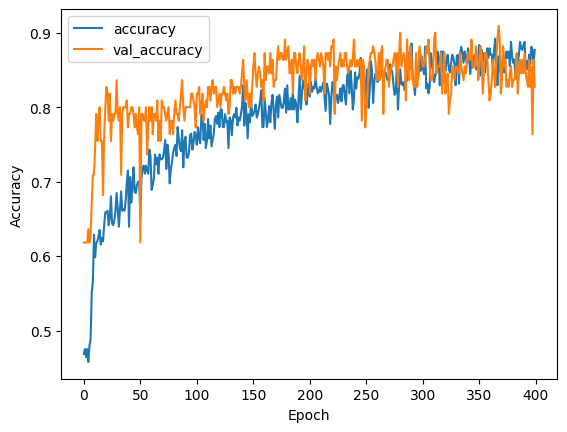

In [55]:
history = model.fit(
    train_generator,
    epochs=400,  
    validation_data=validation_generator,
    batch_size=32,
    callbacks=[Model_Checkpoint])  

with open('LeNettraining_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)
    
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


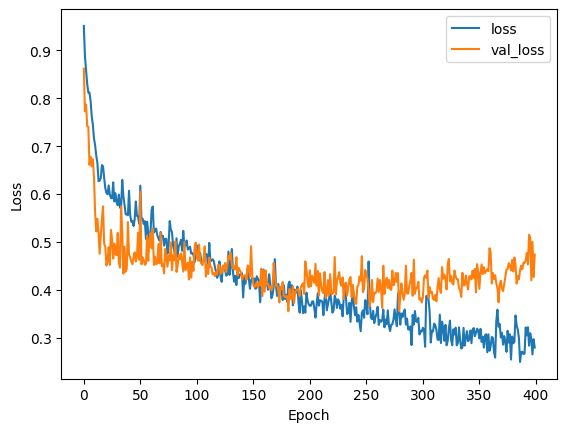

In [56]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
model = tf.keras.models.load_model('LeNetmodelsave.h5')

In [59]:
test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Test",
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')
print(f'Test loss: {test_loss:.4f}')

Found 70 images belonging to 3 classes.
3/3 [==============================] - 1s 37ms/step - loss: 0.4194 - accuracy: 0.8143
Test accuracy: 81.43%
Test loss: 0.4194


In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

3/3 [==============================] - 1s 28ms/step


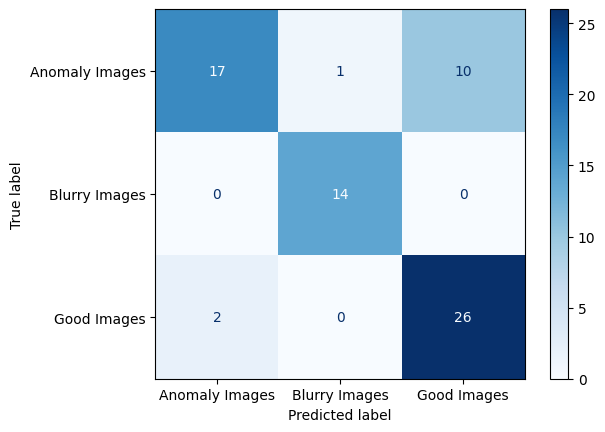

In [61]:
labels = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()